Accuracy: 49.50%


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

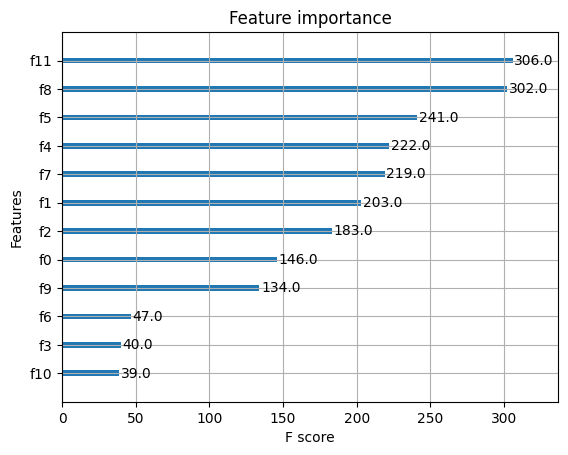

In [18]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset from the CSV file
df = pd.read_csv('soldier_betrayal_dataset.csv')

# Feature Engineering
df['Debt_Greed_Interaction'] = df['Financial Debt'] * df['Greed']
df['Loyalty_Respect_Interaction'] = df['Past Loyalty Record'] * df['Respect for Commanders']
df['Log_Financial_Debt'] = np.log1p(df['Financial Debt'])
df['Rolling_Avg_Performance'] = df['Military Performance'].rolling(window=5, min_periods=1).mean()

# Prepare features and target variable
X = df.drop(columns=['Betrayal'])
y = df['Betrayal']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

bst = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions and evaluate
y_pred_prob = bst.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot feature importance
xgb.plot_importance(bst)
